In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


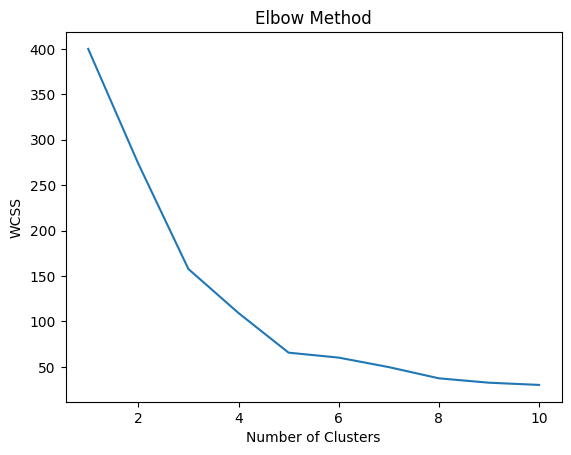

Silhouette Score: 0.5546571631111091


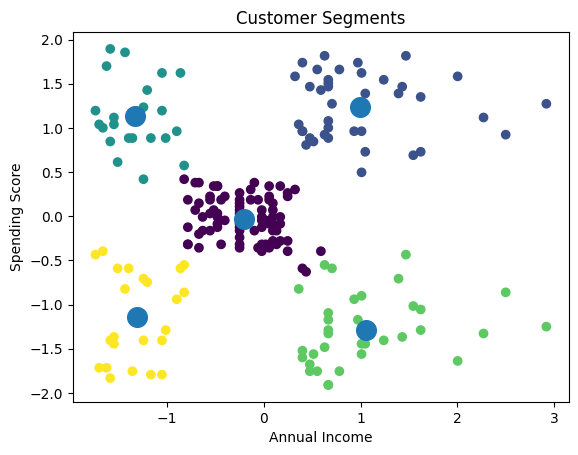

In [3]:
# Task 8: K-Means Clustering

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset (change path if needed)
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

print(df.head())

# Select Features (Annual Income & Spending Score)
X = df.iloc[:, [3,4]]

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Elbow Method
# -----------------------------

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# -----------------------------
# Fit KMeans (K = 5)
# -----------------------------

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

# -----------------------------
# Silhouette Score
# -----------------------------

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

# -----------------------------
# Visualize Clusters
# -----------------------------

plt.figure()
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200)
plt.title("Customer Segments")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()